In [16]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *



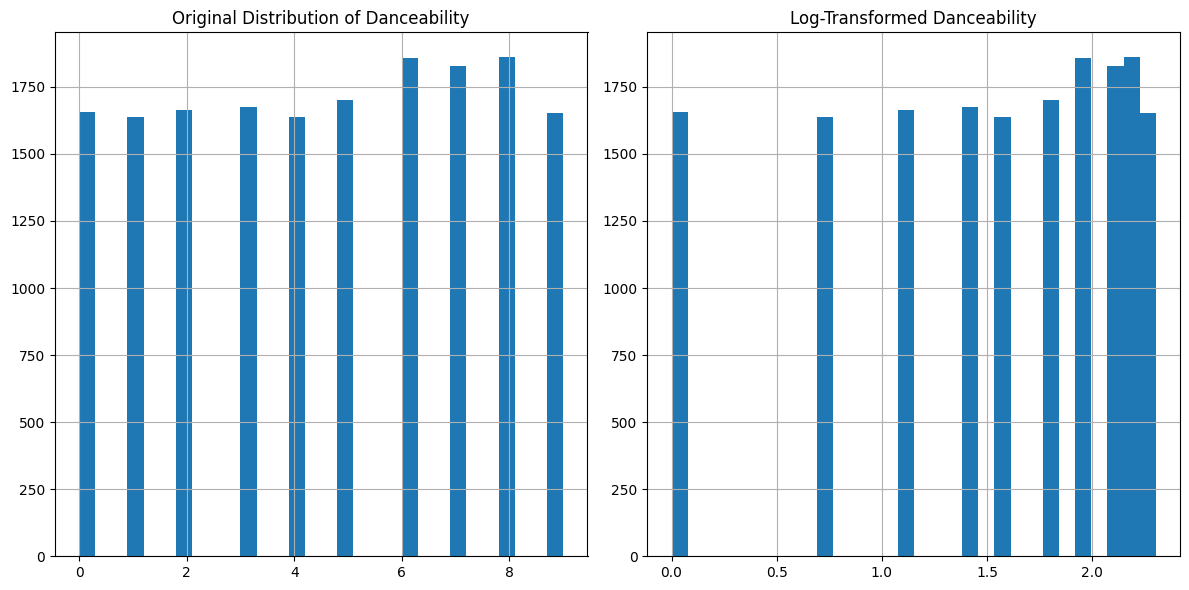

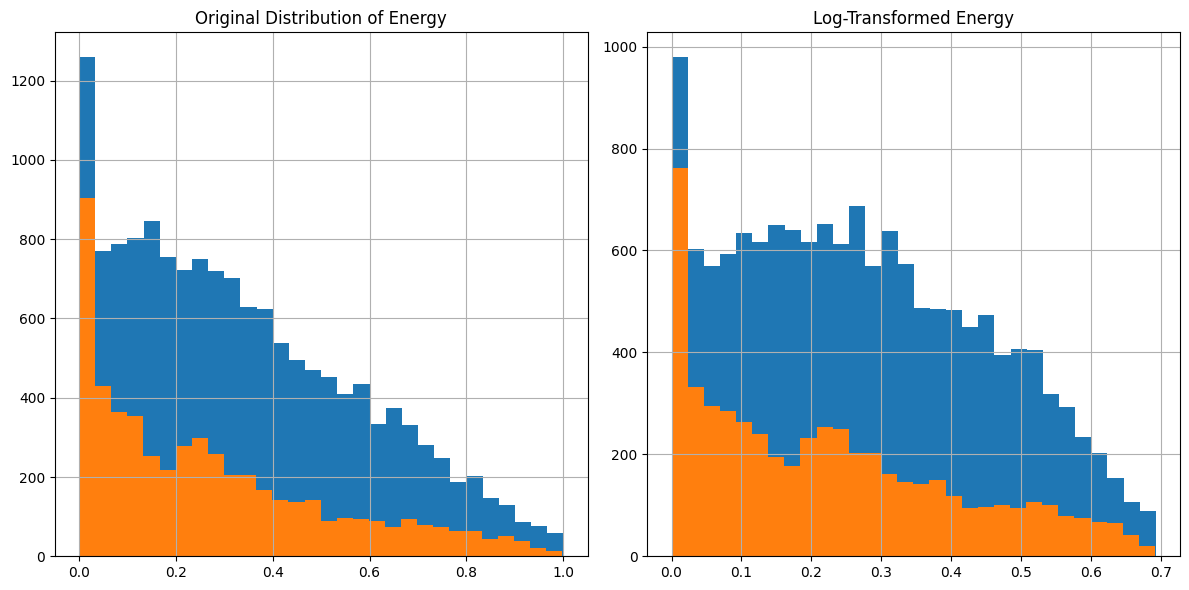

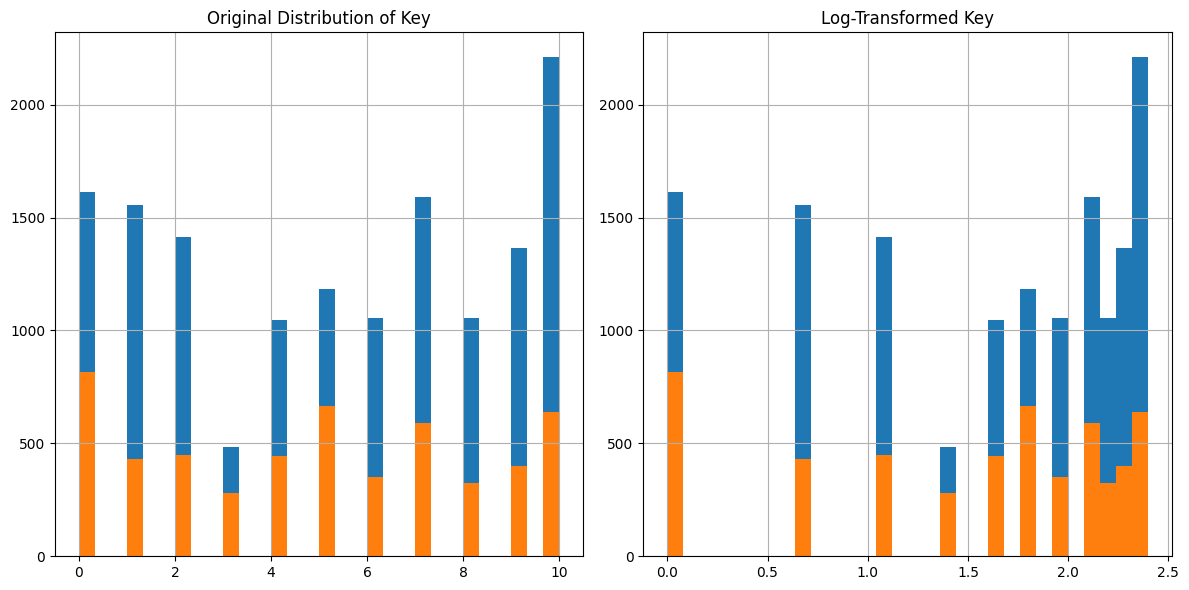

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


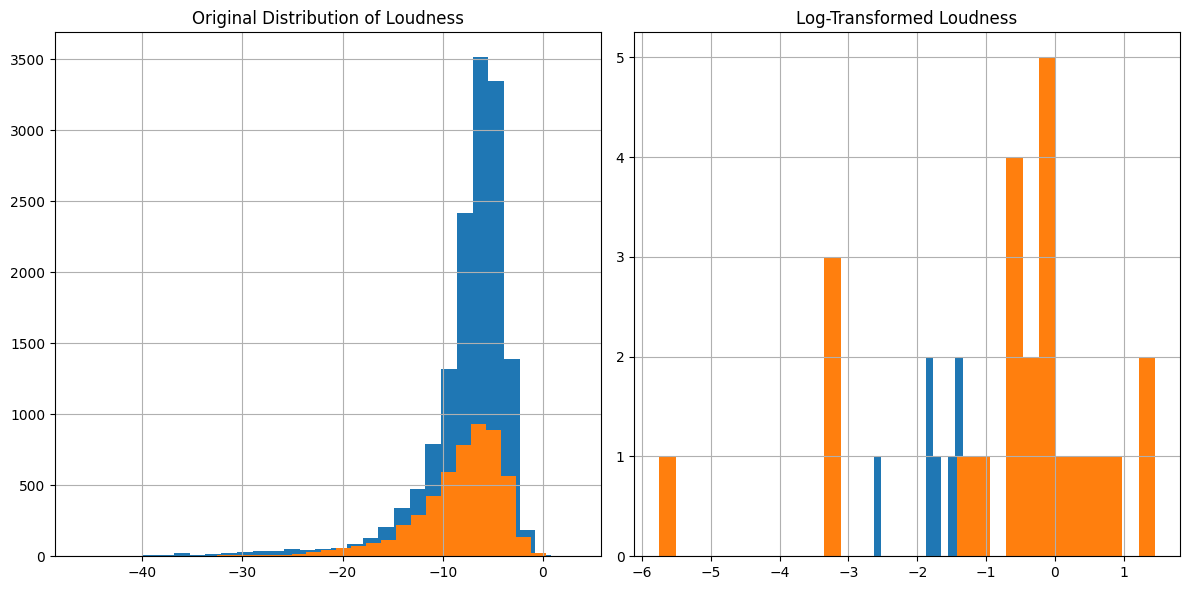

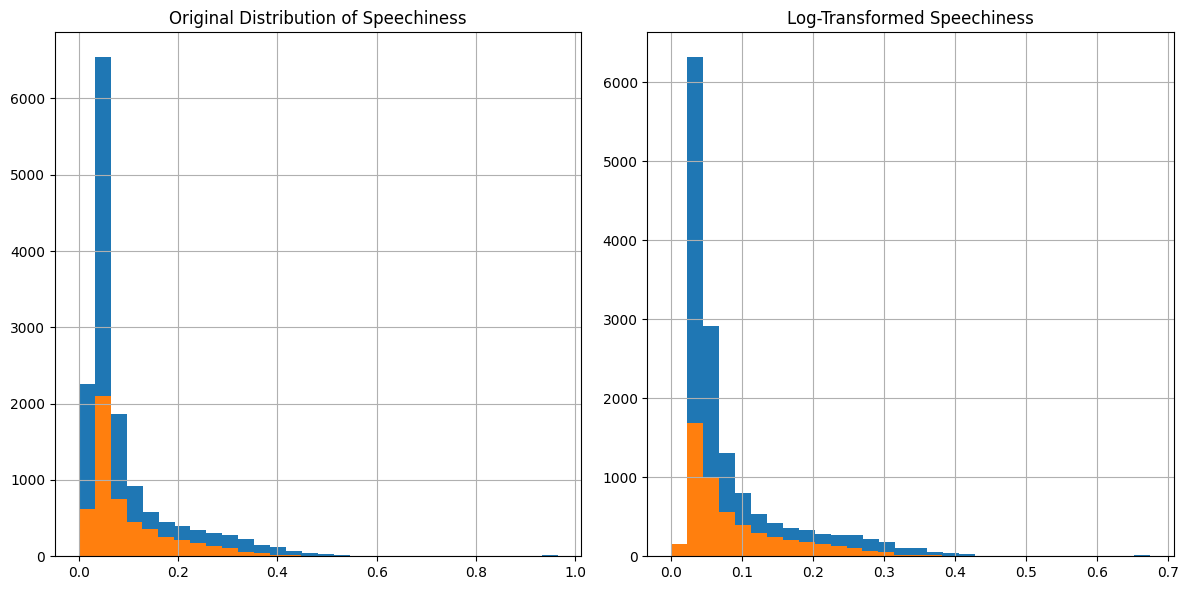

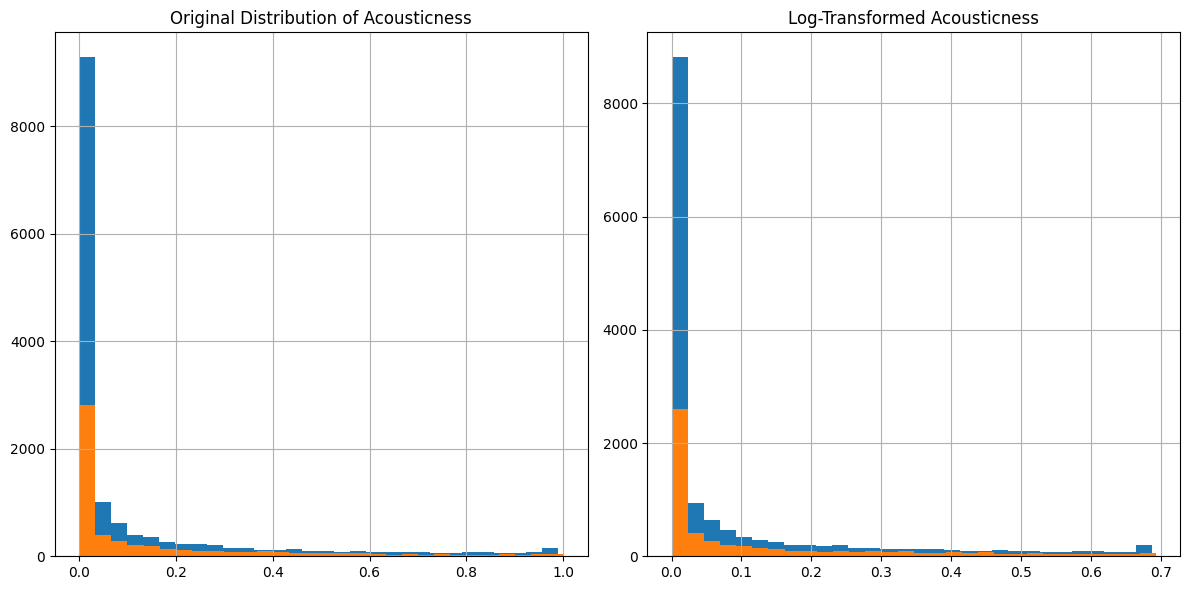

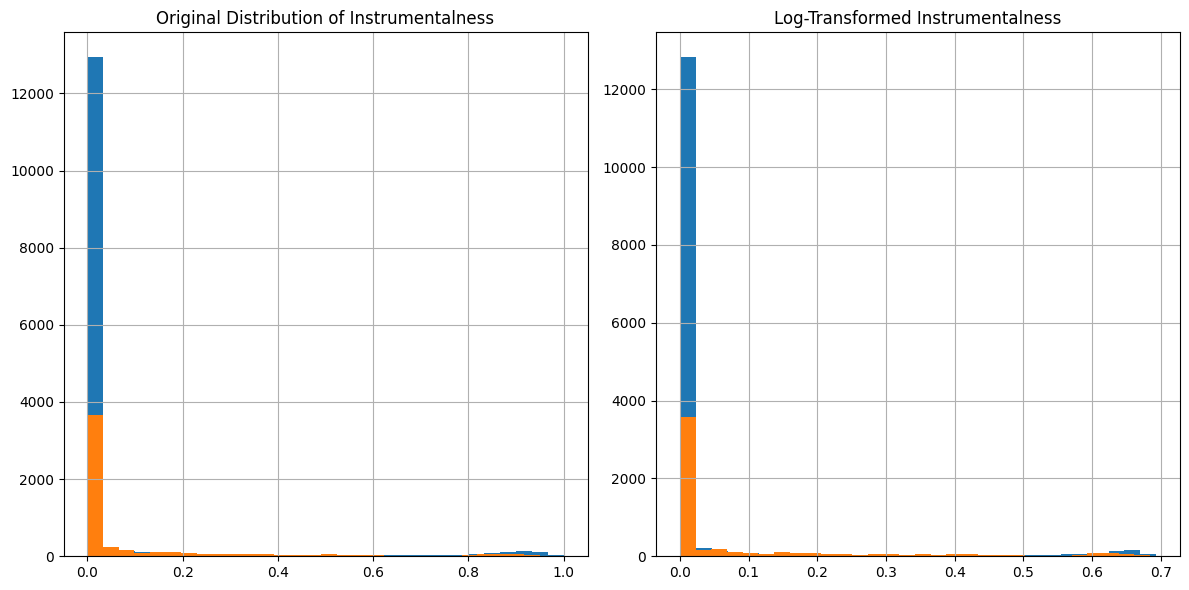

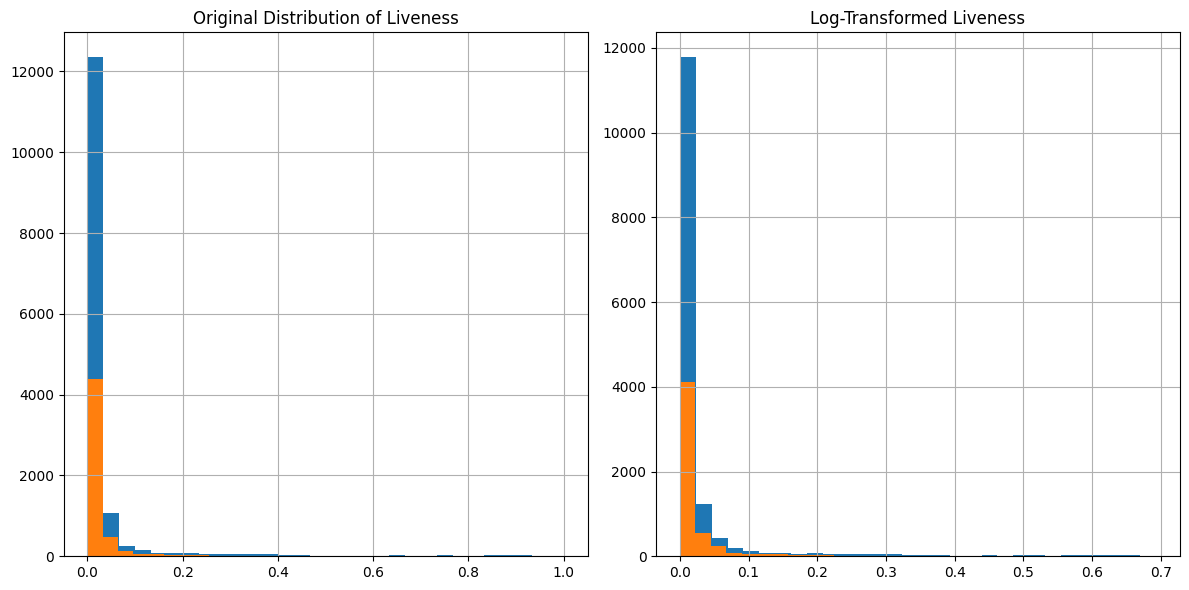

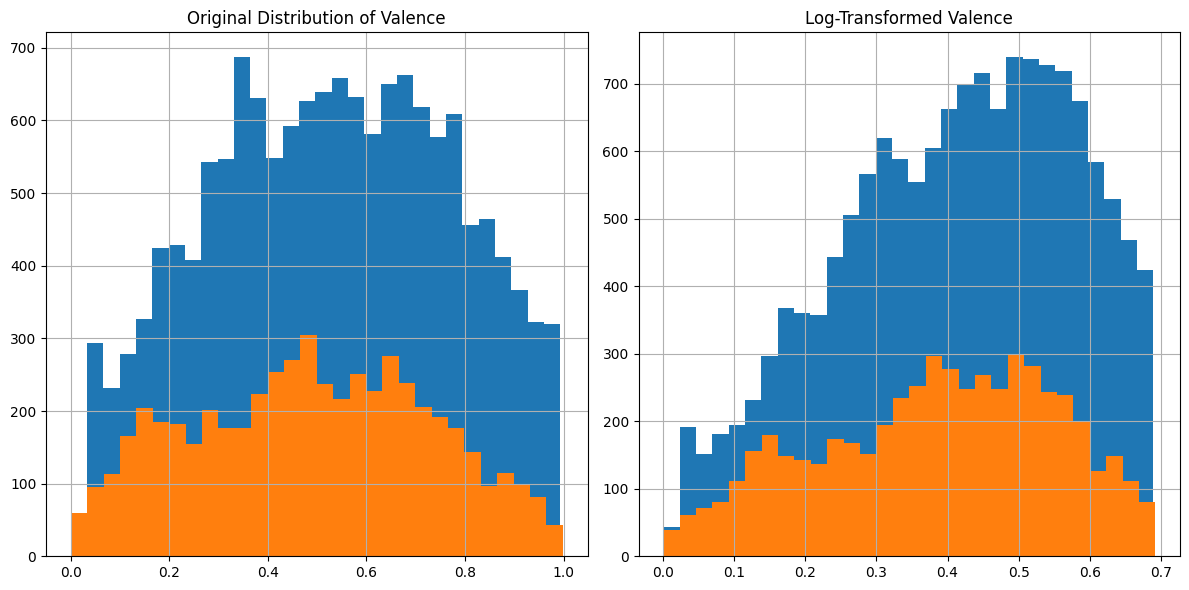

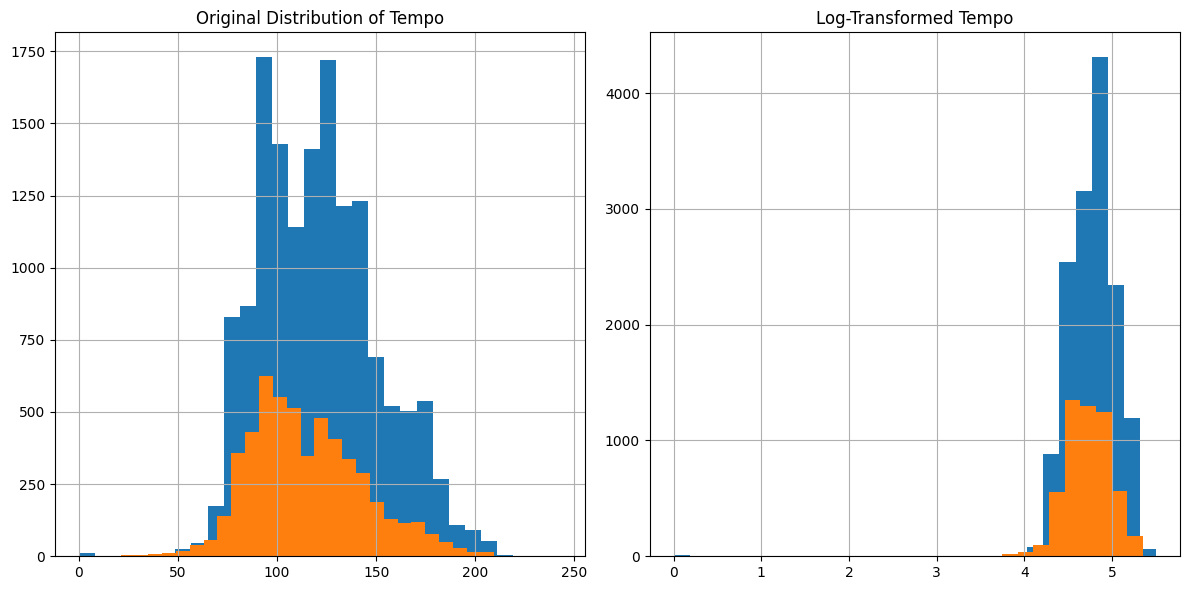

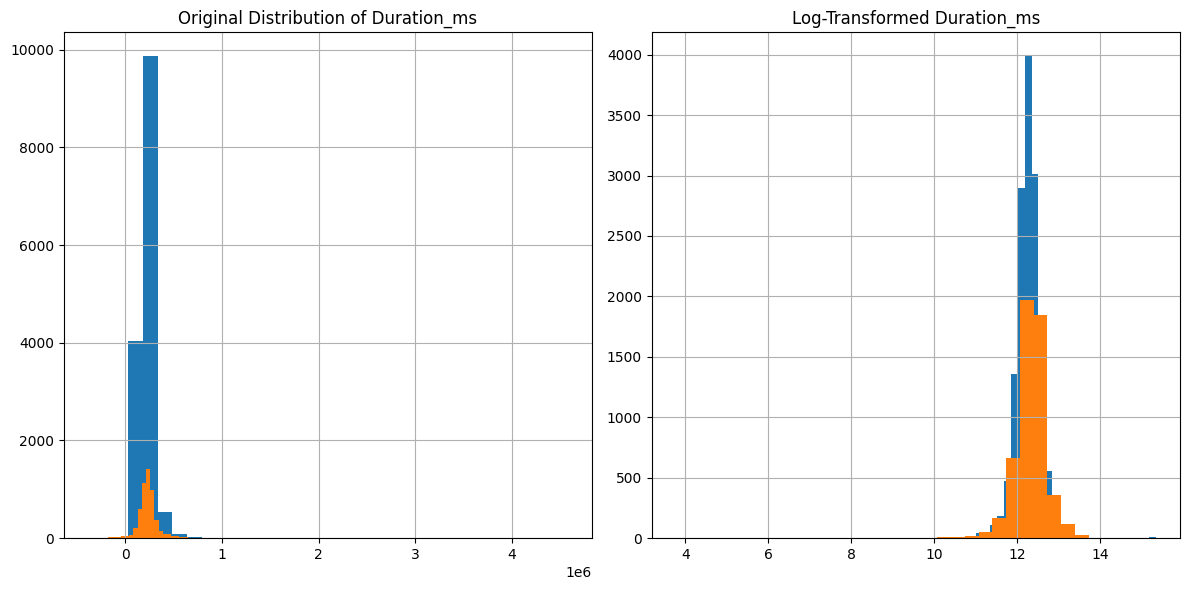

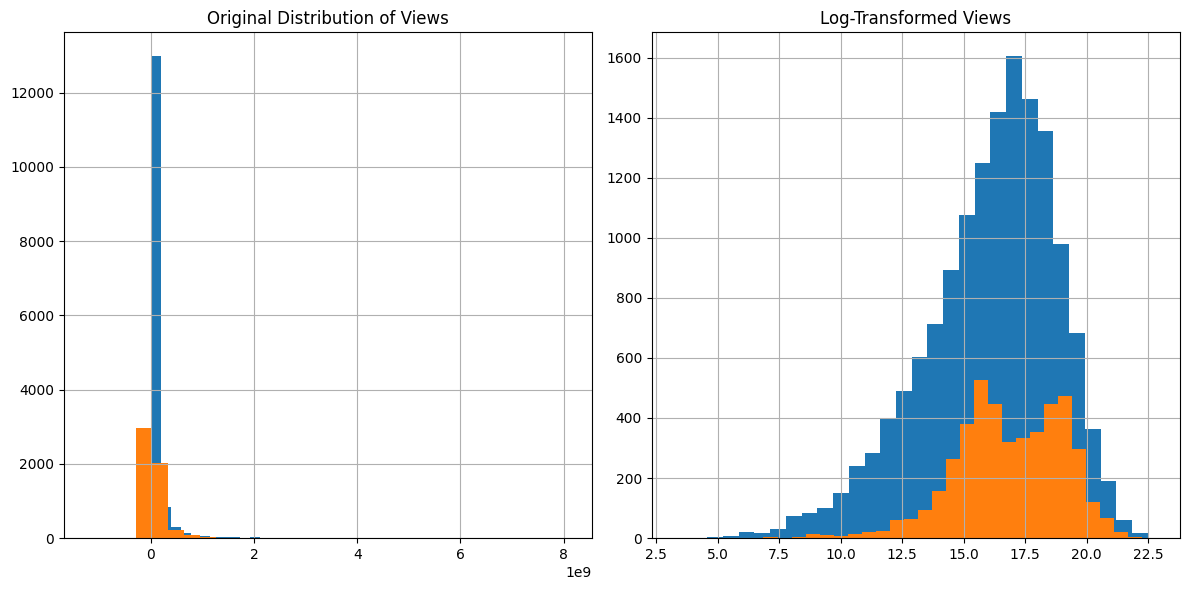

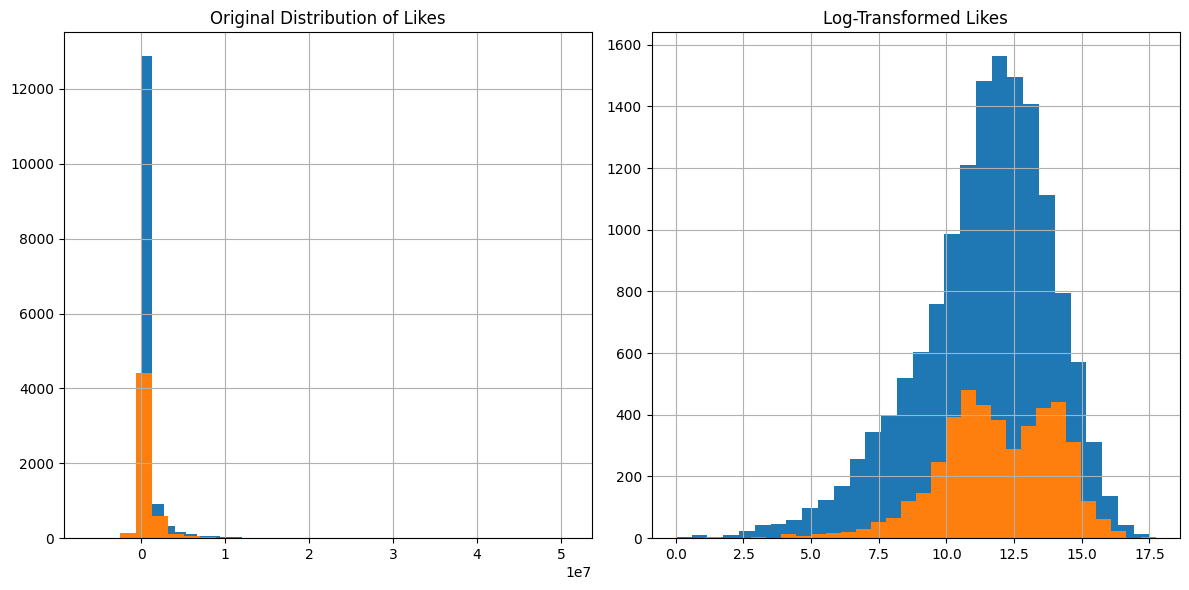

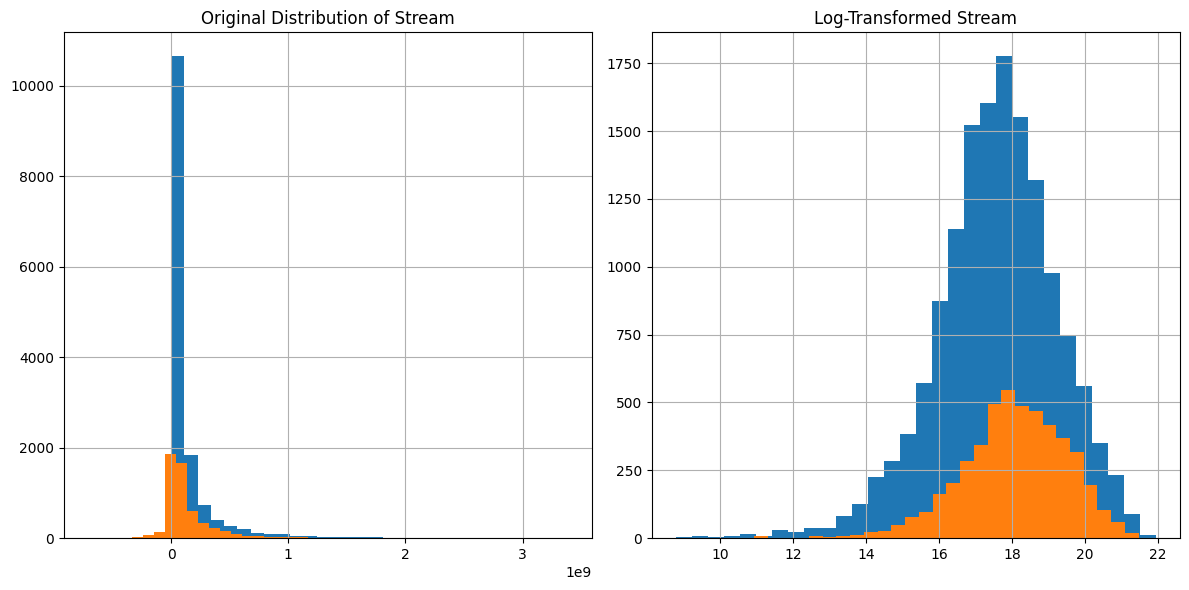

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log1p method

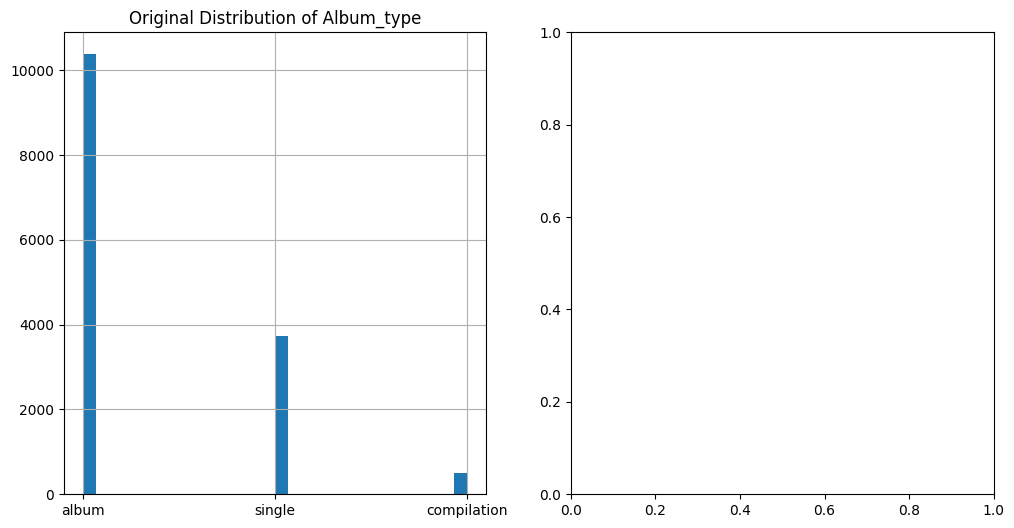

In [17]:
#input and plot data
df_train = pd.read_csv("train.csv", index_col='id')
df_test = pd.read_csv("test.csv", index_col='id')

import matplotlib.pyplot as plt
import numpy as np


for feature in df_train.columns:
    # Create a new figure for each feature
    plt.figure(figsize=(12,6))

    # Plot original distribution
    plt.subplot(1, 2, 1)
    df_train[feature].hist(bins=30)
    plt.title('Original Distribution of '+ feature)

    # Plot distribution after log transformation
    plt.subplot(1, 2, 2)
    np.log1p(df_train[feature]).hist(bins=30)
    plt.title('Log-Transformed ' + feature)

    if feature != "Danceability":
        plt.subplot(1, 2, 1)
        df_test[feature].hist(bins=30)
        plt.title('Original Distribution of '+ feature)

        # Plot distribution after log transformation
        plt.subplot(1, 2, 2)
        np.log1p(df_test[feature]).hist(bins=30)
        plt.title('Log-Transformed ' + feature)

    plt.tight_layout()
    plt.show()

In [18]:

for col in ['Views', 'Likes', 'Stream', 'Comments', 'Duration_ms']:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])
    
    
df_train['Key'] = df_train['Key'].apply(lambda x: x if np.isnan(x) else int(x) )
df_test['Key'] = df_test['Key'].apply(lambda x: x if np.isnan(x) else int(x) )

for feature in ['Album_type', 'Licensed', 'official_video', 'Key']:
    df_train = pd.get_dummies(df_train, columns=[feature], prefix=feature)
    df_test = pd.get_dummies(df_test, columns=[feature], prefix=feature)

df_train = df_train.select_dtypes(exclude=['object'])
df_test = df_test.select_dtypes(exclude=['object'])

df_train.info()
df_test.info()
df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17170 entries, 0 to 17169
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Danceability            17170 non-null  float64
 1   Energy                  14615 non-null  float64
 2   Loudness                14601 non-null  float64
 3   Speechiness             14655 non-null  float64
 4   Acousticness            14593 non-null  float64
 5   Instrumentalness        14569 non-null  float64
 6   Liveness                14635 non-null  float64
 7   Valence                 14596 non-null  float64
 8   Tempo                   14608 non-null  float64
 9   Duration_ms             14567 non-null  float64
 10  Views                   14574 non-null  float64
 11  Likes                   14591 non-null  float64
 12  Stream                  14602 non-null  float64
 13  Comments                14589 non-null  float64
 14  Album_type_album        17170 non-null

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0
id,,,,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,NaN,138.559000,12.313316,20.357341,...,0,0,0,0,0,1,0,0,0,0
17171,0.347429,-5.815000,0.030200,NaN,0.000687,0.000099,0.852000,92.761000,12.206942,18.092338,...,0,0,0,0,0,0,0,1,0,0
17172,0.786330,-3.930000,0.052200,7.676563e-05,NaN,0.001561,0.551000,108.014000,12.279095,15.947907,...,1,0,0,0,0,0,0,0,0,0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,12.362512,NaN,...,0,1,0,0,0,0,0,0,0,0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,12.739406,20.242777,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,12.361892,16.081098,...,0,0,0,0,0,0,1,0,0,0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,NaN,11.840266,17.638231,...,0,0,0,0,0,0,0,0,0,1
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,12.132658,NaN,...,0,0,0,0,1,0,0,0,0,0


In [19]:
#impute data

#with KNN
imputer = KNNImputer(n_neighbors=5) 
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns = df_train.columns)
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns = df_test.columns)

#fill missing value in training set with mean
#df_train = df_train.fillna(df_train.mean())
#df_test = df_test.fillna(df_test.mean()) 

#df_train = df_train.fillna(df_train.median())

#fill missing value in testing set with mean
#df_test = df_test.fillna(df_test.median())

#discretize for weird shape data
#discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
#df_train[['Likes', 'Views', 'Tempo']] = discretizer.fit_transform(X[['Likes', 'Views', 'Tempo']])
#df_test[['Likes', 'Views', 'Tempo']] = discretizer.fit_transform(X[['Likes', 'Views', 'Tempo']])

#convert training and testing set to numpy array
X_test = df_test.to_numpy()
X = df_train.drop(["Danceability"], axis=1).to_numpy()
Y = df_train['Danceability'].to_numpy()

#use polynomial features

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
X_test = poly.fit_transform(X_test)


#normalize the training and testing data
trainscaler = StandardScaler()
trainscaler.fit(X)
X = trainscaler.transform(X)
testscaler = StandardScaler()
testscaler.fit(X_test)
X_test = testscaler.transform(X_test)
print(X.shape)
df_test

(17170, 528)


,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,...,Key_1.0,Key_2.0,Key_3.0,Key_4.0,Key_5.0,Key_6.0,Key_7.0,Key_8.0,Key_9.0,Key_10.0
0,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.536962,138.559000,12.313316,20.357341,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.347429,-5.815000,0.030200,6.671771e-02,0.000687,0.000099,0.852000,92.761000,12.206942,18.092338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.786330,-3.930000,0.052200,7.676563e-05,0.087031,0.001561,0.551000,108.014000,12.279095,15.947907,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,12.362512,19.308360,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,12.739406,20.242777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,12.361892,16.081098,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6311,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,105.094770,11.840266,17.638231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6312,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,12.132658,16.962112,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6313,0.204440,-11.563964,0.037676,3.630868e-03,0.491785,0.030605,0.482987,125.827414,12.104263,16.665138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#simple train-test spit
#this block of code is intended to try 2rd order polynomial feature with different C, missing value is imputed by mean()

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2)

mae_scores = []

#select C
rough = [-6, -3, 0, 3, 6]
fine = [-5, -4, -3, -2, -1]
times = 0
#progress = tqdm(total=5)

for k in rough:
    
    mae = 0
    #model = LogisticRegression(penalty="l1", max_iter=1000, solver='liblinear', C = 10**k)
    model = Lasso(alpha = 10**k, max_iter=3000)
    model.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    mae = np.mean(np.abs(pred_y - val_y))
    mae_scores.append(mae)
    #progress.update(1)

print(mae_scores)
#[2.088235294117647, 2.06814210832848, 2.075422248107164, 2.076295864880606, 2.076587070471753] with [10^0, 10^1, 10^2, 10^3, 10^4, 10^5]
#imputewith mean, rough, 2 poly [1.8268590396878552, 1.8209803639207907, 2.4246867385259447, 2.4761082942204253, 2.4761082942204253]
#imputewith knn, rough, 2 poly 
#imputewith knn, rough, 3 poly [1.9322539636402558, 1.733490762643905, 2.3942538905148107, 2.4995287625305753, 2.4995287625305753]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.885e+04, tolerance: 1.121e+01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+03, tolerance: 1.121e+01
  model = cd_fast.enet_coordinate_descent(


[1.7311036607367638, 1.728681545134528, 2.4065836364012303, 2.5078928248095633, 2.5078928248095633]


In [21]:
#simple train test split with xgboost
from xgboost import XGBRegressor

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2)

mae_scores = []

#select C
rough = [-6, -3, 0, 3, 6]
#progress = tqdm(total=5)

for k in rough:
    
    mae = 0
    model = XGBRegressor(alpha=10**k)
    model.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    mae = np.mean(np.abs(pred_y - val_y))
    mae_scores.append(mae)
    #progress.update(1)

print(mae_scores)

#impute with knn, 2, xgb [1.612267935622796, 1.6170675876340463, 1.6037912211195393, 1.7031330912610994, 4.144729178800233]

[1.612267935622796, 1.6170675876340463, 1.6037912211195393, 1.7031330912610994, 4.144729178800233]


In [23]:
# V-fold cross validation

mae_scores = []

#select C
rough = [-6, -3, 0, 3, 6]

#we conduct n fold cross validation for l1 Logistic regression, with different C value
N = 5

progress = tqdm(total=30)

for k in rough:

    kf = KFold(n_splits=N)
    mae = 0

    for train_index, val_index in kf.split(X):
        train_x, val_x = X[train_index], X[val_index]
        train_y, val_y = Y[train_index], Y[val_index]

        #model = LogisticRegression(penalty="l1", max_iter=2000, solver='liblinear', C = k)
        #model = Lasso(alpha=100**k, max_iter=2000)
        model = XGBRegressor(alpha=10**k)
        model.fit(train_x, train_y)
        pred_y = model.predict(val_x)
        mae += np.mean(np.abs(pred_y - val_y)) / N
        progress.update(1)

    mae_scores.append(mae)  

print(mae_scores)
# maybe for now we choose C = 3
#2nd order polynomial feature: [4.490645599390507, 4.490645599390507, 2.128427572957037, 2.1756103216403324, 2.1836678922786446]
#[2.1254513686662784, 2.1242283051834594, 2.1239953407105414, 2.1224810716365754, 2.1231799650553294, 2.1232382061735584] for [5, 7, 9, 11, 13, 15]

#imputewith mean, rough, 2 [1.8681234085304714, 1.8681075473038415, 2.4663116734860986, 2.5131391810084427, 2.5131391810084427]
#imputewith knn, rough, 1 [1.8897250007793533, 1.8897253110313965, 2.422893408533314, 2.5131391810084427, 2.5131391810084427]
#imputewith knn, rough, 2 [1.747054540633931, 1.747035929819993, 2.4137156982412415, 2.5131391810084427, 2.5131391810084427]
#imputewith knn, rough, 3 [3.31324432681507, 2.055987961209408, 2.4137156982412415, 2.5131391810084427, 2.5131391810084427]
#impute with knn, rough, 2, xgb [1.6411588006311137, 1.6374657147348113, 1.6424720719698995, 1.7222912331158917, 4.1824111822947]

 83%|████████▎ | 25/30 [04:01<00:17,  3.40s/it]

[1.6411588006311137, 1.6374657147348113, 1.6424720719698995, 1.7222912331158917, 4.1824111822947]


In [22]:
from xgboost import XGBRegressor
#retrain the model with full data
#model = LogisticRegression(penalty="l1", max_iter=2000, solver='liblinear', C = 12)
df_test = pd.read_csv("test.csv", index_col='id')
model = XGBRegressor(alpha=1)
model.fit(X, Y)
df_test['Danceability'] = model.predict(X_test)
df_test['Danceability'].to_csv('submission.csv', index=True)